## Connecting to drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/hotel_bookings 2.csv')

First five rows of data

### Exploratory Data Analysis and Data cleaning

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


Last five rows of data

In [5]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


Rows and column count of dataset

In [6]:
df.shape

(119390, 32)

Columns list of dataset

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

General information of columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y', dayfirst=True)

In [33]:
df.describe(include='object').T

,count,unique,top,freq
hotel,118897,2,City Hotel,79301
arrival_date_month,118897,12,August,13852
meal,118897,5,BB,91862
country,118897,177,PRT,48585
market_segment,118897,7,Online TA,56402
distribution_channel,118897,5,TA/TO,97729
reserved_room_type,118897,10,A,85600
assigned_room_type,118897,12,A,73862
deposit_type,118897,3,No Deposit,104163
customer_type,118897,4,Transient,89173


In [11]:
for col in df.describe(include='object').columns:
  print(col)
  print(df[col].unique())


hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [12]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [13]:
df.drop(['company','agent'], axis=1, inplace= True)


In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [17]:
df = df[df['adr']<5000]

#Data Analysis and Visualization

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


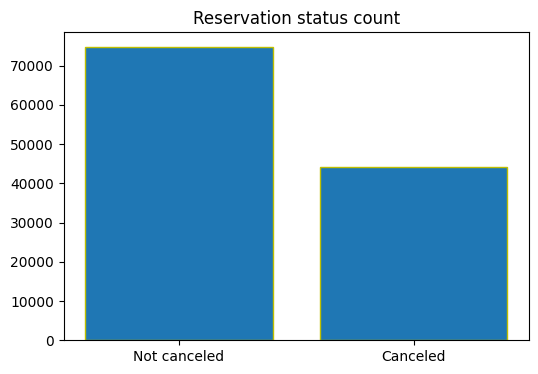

In [18]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize= (6,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor='y')
plt.show()

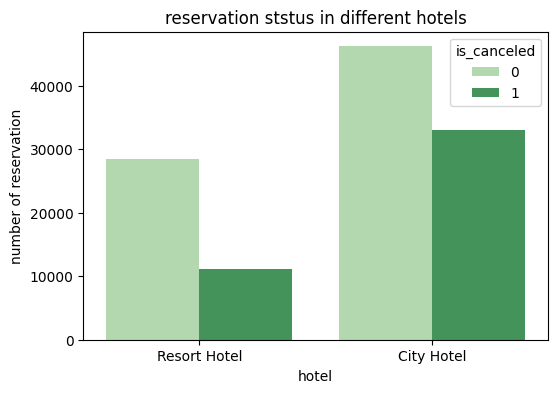

In [19]:
plt.figure(figsize = (6,4))
sns.countplot(x='hotel',hue='is_canceled',data=df, palette='Greens')
plt.title('reservation ststus in different hotels')
plt.xlabel=('hotel')
plt.ylabel('number of reservation')
plt.show()

In [20]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.72025
1,0.27975


In [21]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.582918
1,0.417082


In [22]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

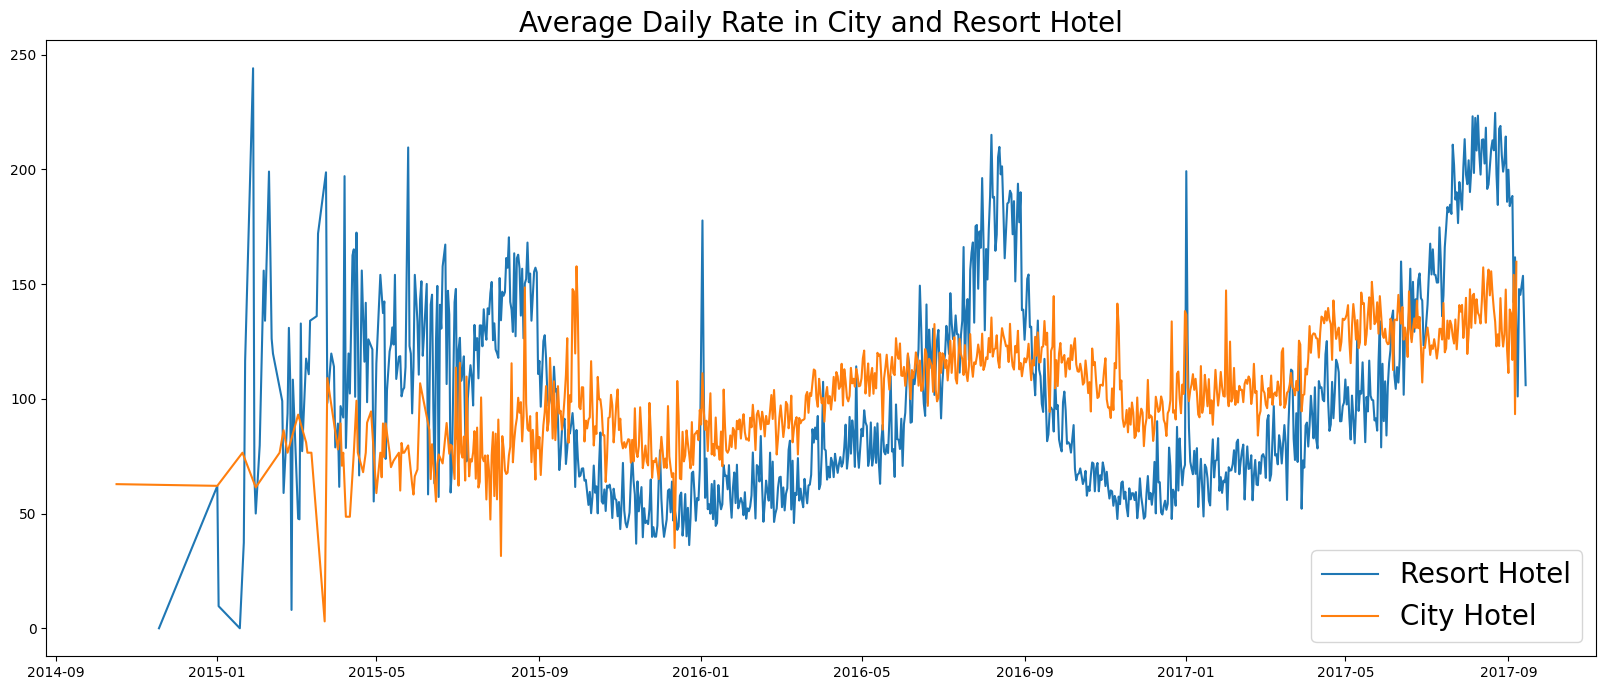

In [23]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotel',fontsize = 20)
plt.plot(resort_hotel.index, resort_hotel['adr'],label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'],label='City Hotel')
plt.legend(fontsize=20)
plt.show()

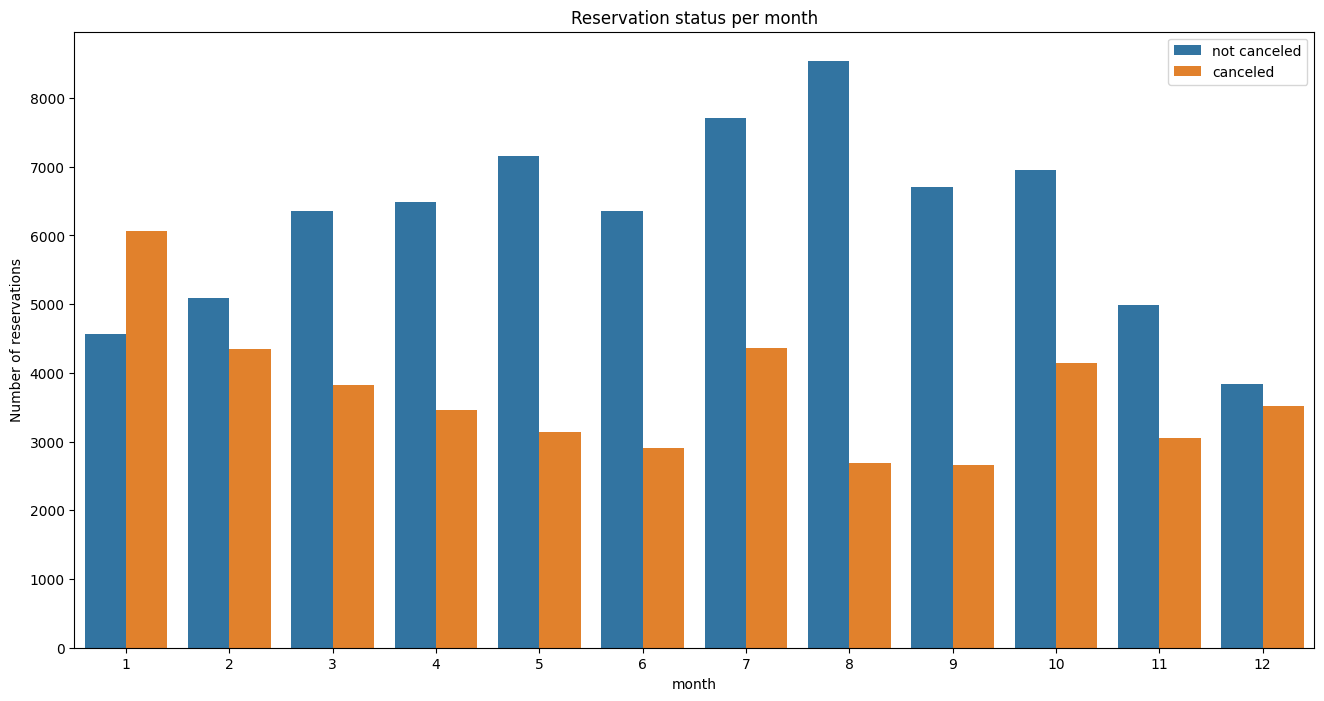

In [24]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
sns.countplot(x='month',hue='is_canceled',data=df)
plt.title('Reservation status per month')
plt.ylabel('Number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

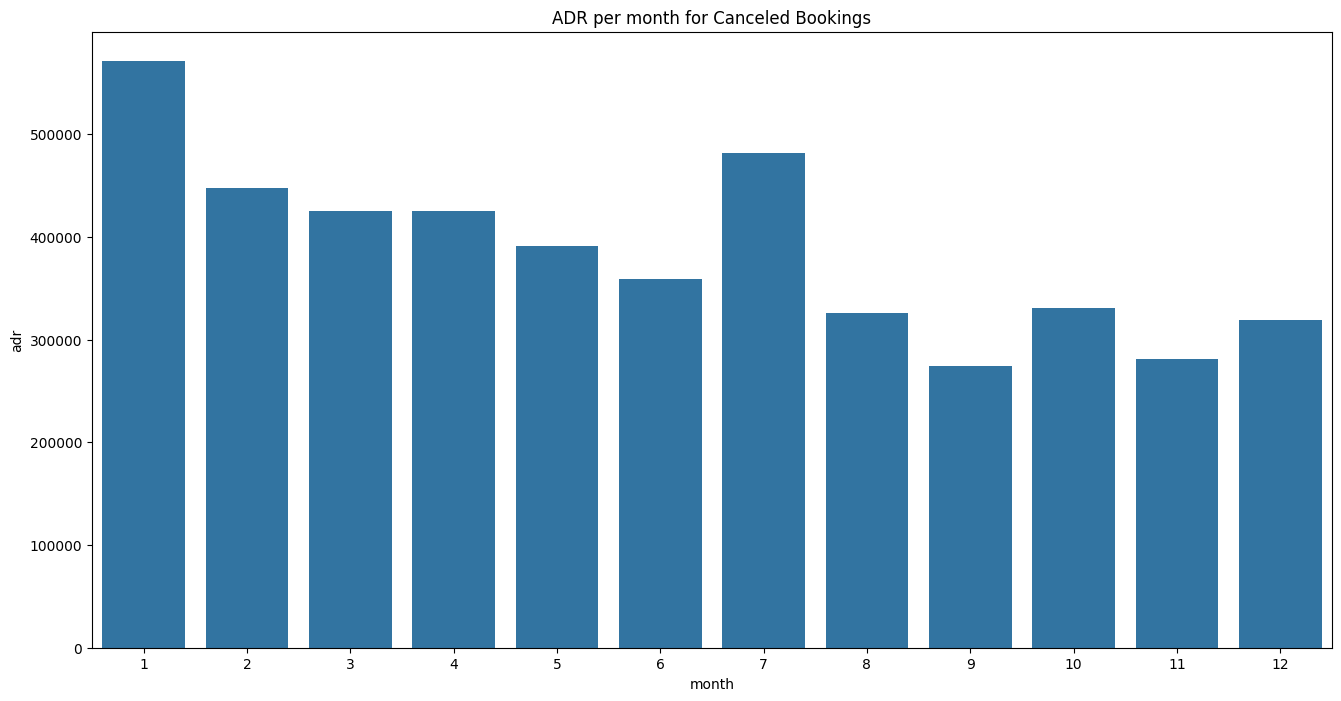

In [25]:
plt.figure(figsize=(16,8))
sns.barplot(x='month',y='adr', data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.title('ADR per month for Canceled Bookings')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

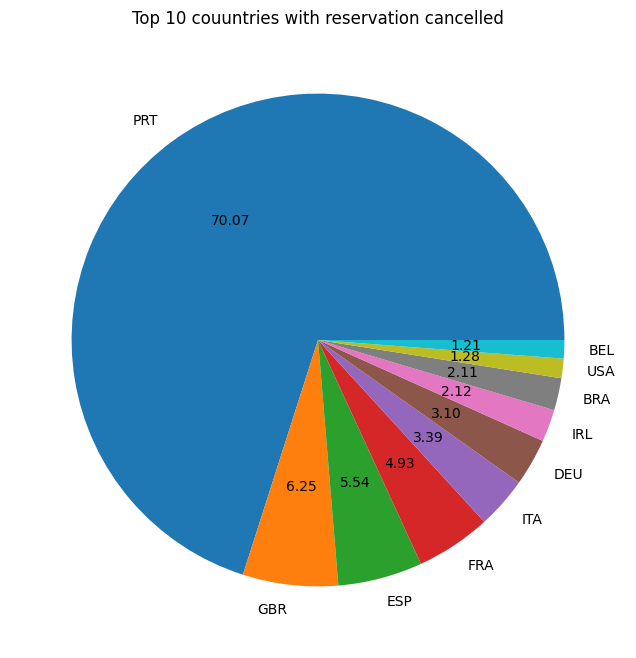

In [26]:
cancelled_data = df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title("Top 10 couuntries with reservation cancelled")
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index)
plt.show

In [27]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,56402
Offline TA/TO,24159
Groups,19806
Direct,12448
Corporate,5111
Complementary,734
Aviation,237


In [28]:
df['market_segment'].value_counts(normalize=True)

,proportion
market_segment,
Online TA,0.474377
Offline TA/TO,0.203193
Groups,0.166581
Direct,0.104696
Corporate,0.042987
Complementary,0.006173
Aviation,0.001993


In [29]:
cancelled_data['market_segment'].value_counts(normalize=True)

,proportion
market_segment,
Online TA,0.469696
Groups,0.273985
Offline TA/TO,0.187466
Direct,0.043486
Corporate,0.022151
Complementary,0.002038
Aviation,0.001178


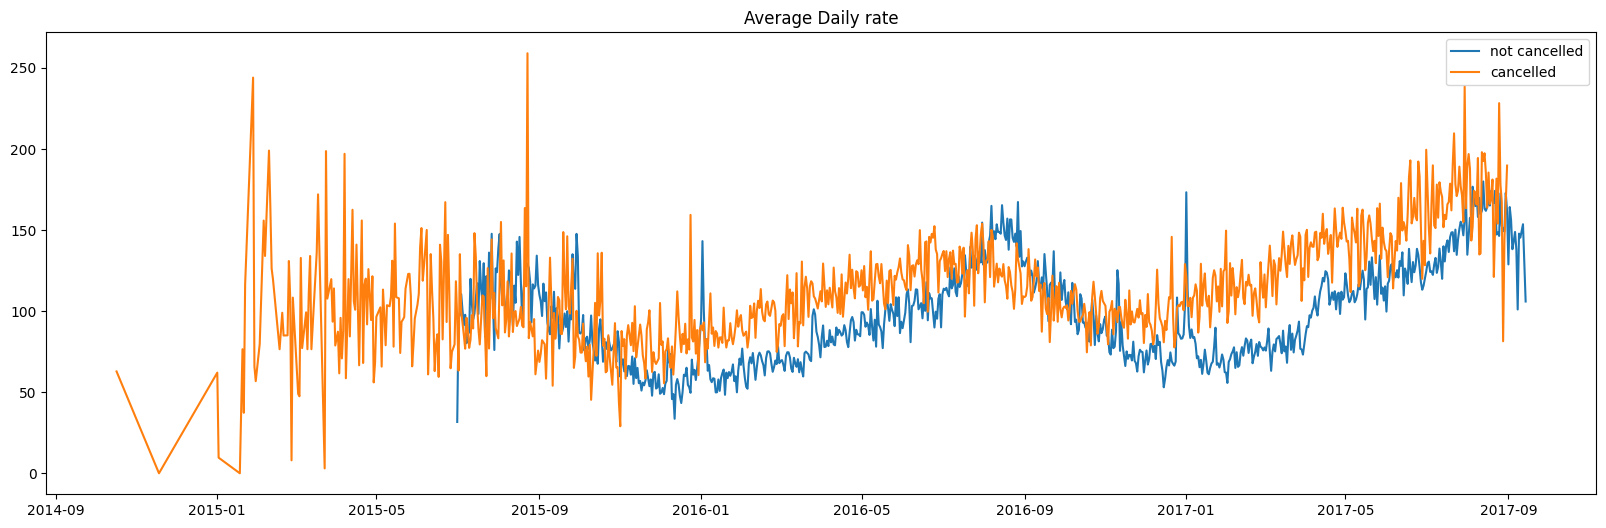

In [30]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = df[df['is_canceled']==0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize=(20,6))
plt.title('Average Daily rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='cancelled')
plt.legend()

In [31]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2015-09') & (cancelled_df_adr['reservation_status_date'] < '2016-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2015-09') & (not_cancelled_df_adr['reservation_status_date'] < '2016-09')]

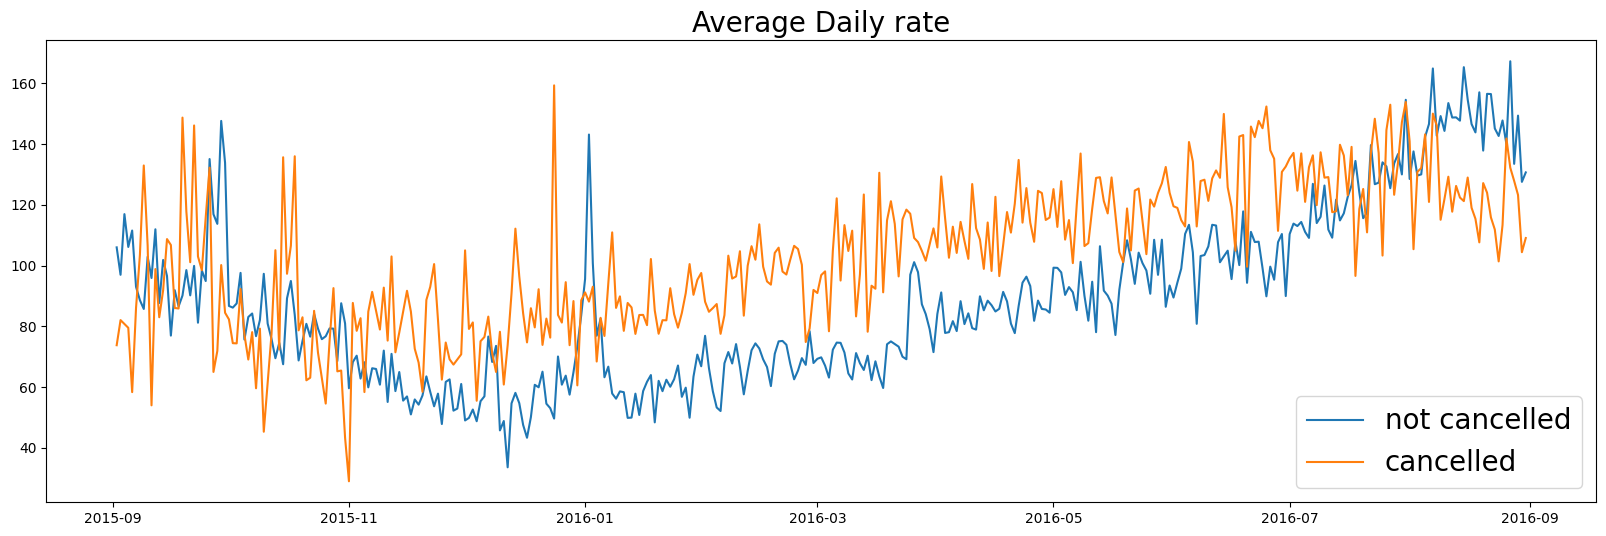

In [32]:
plt.figure(figsize=(20,6))
plt.title('Average Daily rate',fontsize= 20)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='cancelled')
plt.legend(fontsize= 20)

#Building Machine learning models


#Drop the irrelevant features which does not have effect on prediction of booking:
Country: We drop this as lots of categorical value is present. If it is necessary to be in prediction we can group by as continent section and perform with lesser values.

Reservation_status_date: This will only occur once a room is booked, so this is not significant in our model prediction

assigned_room_type: Selection of room type is made before reservation so there is no link of cancellation after booking a room

reservation status: Reservation status has three values of check_out, cancelled and no-show. So the value from cancelled and no show are like not cancelled and canceled type will result into cancelled data as like our target variable so we this will result in data leakage

arrival_date_year : There is no significance of this column as we are predicting the future and presence of yearly data will show bias in our model on yearly basis so it is not relevant to use the year.


In [39]:
df = df.drop([ 'country',  'reservation_status_date','assigned_room_type','reservation_status','arrival_date_year'], axis=1)


Handleing noisy data:

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118897.0,0.371347,0.483167,0.00,0.0,0.0,1.0,1.0
lead_time,118897.0,104.312018,106.903570,0.00,18.0,69.0,161.0,737.0
arrival_date_week_number,118897.0,27.166674,13.589966,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118897.0,15.800802,8.780321,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118897.0,0.928905,0.996217,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118897.0,2.502157,1.900171,0.00,1.0,2.0,3.0,41.0
adults,118897.0,1.858390,0.578578,0.00,2.0,2.0,2.0,55.0
children,118897.0,0.104208,0.399174,0.00,0.0,0.0,0.0,10.0
babies,118897.0,0.007948,0.097381,0.00,0.0,0.0,0.0,10.0
is_repeated_guest,118897.0,0.032011,0.176030,0.00,0.0,0.0,0.0,1.0


We can see value of adr in negative which is a noise in dataframe so lets fill it

In [58]:
adr = df['adr']<0
adr.value_counts()

,count
adr,
False,118897


Fill the row with median value

In [57]:
df.loc[df['adr'] < 0,'adr']=df['adr'].median()

In column children and babies we can see the value 10 as max, so these are mistakes during data entry as there will not be that much childrens present so we remove those rows

In [61]:
df=df[df['children'] !=10]

In [62]:
df=df[df['babies'] !=10]

Also the minimum value of adult is seem to be 0, which is also irrelevant. Dropping the rows with 0 adults.

In [64]:
df=df[df['adults'] !=0]

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118502.0,0.371741,0.483272,0.0,0.0,0.0,1.0,1.0
lead_time,118502.0,104.364585,106.931735,0.0,18.0,69.0,161.0,737.0
arrival_date_week_number,118502.0,27.166183,13.583952,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118502.0,15.798999,8.780585,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118502.0,0.928195,0.992839,0.0,0.0,1.0,2.0,16.0
stays_in_week_nights,118502.0,2.500726,1.889629,0.0,1.0,2.0,3.0,40.0
adults,118502.0,1.864551,0.569540,1.0,2.0,2.0,2.0,55.0
children,118502.0,0.100648,0.389746,0.0,0.0,0.0,0.0,3.0
babies,118502.0,0.007865,0.092989,0.0,0.0,0.0,0.0,9.0
is_repeated_guest,118502.0,0.031645,0.175054,0.0,0.0,0.0,0.0,1.0


Converting arrival date month, an ordinal column into numeric value as its a natural occuring value.

In [67]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

<ipython-input-67-47bd01a60a79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)


Lets convert the nominal categorical value with one hot encoding.

In [70]:
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118502 entries, 0 to 119389
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118502 non-null  int64  
 1   lead_time                       118502 non-null  int64  
 2   arrival_date_month              118502 non-null  int64  
 3   arrival_date_week_number        118502 non-null  int64  
 4   arrival_date_day_of_month       118502 non-null  int64  
 5   stays_in_weekend_nights         118502 non-null  int64  
 6   stays_in_week_nights            118502 non-null  int64  
 7   adults                          118502 non-null  int64  
 8   children                        118502 non-null  float64
 9   babies                          118502 non-null  int64  
 10  is_repeated_guest               118502 non-null  int64  
 11  previous_cancellations          118502 non-null  int64  
 12  previous_bookings_not

#Lets start splitting and building models


In [74]:
#Importing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [72]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [75]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

## Desicion tree model

In [93]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')  # Change to 'macro' or 'weighted' for multiclass
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

# Print the metrics
print("Random Forest Classifier Evaluation Metrics ")
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)

Random Forest Classifier Evaluation Metrics (Without Hyperparameter Tuning)
Accuracy:  0.9346441078435509
Precision:  0.9664696813977389
Recall:  0.853819089774146
F1 Score:  0.9066586321181078


In [90]:
# Define the parameter distributions for RandomizedSearchCV
param_distributions_dt = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Set up the randomized search
random_search_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=param_distributions_dt,
                                       n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the randomized search model
random_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e2858460430>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e2858463e20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e28584612d0>},
                   random_state=42, verbose=2)

In [91]:
# Evaluate Decision Tree
y_pred_dt = random_search_dt.best_estimator_.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='binary')  # Change to 'macro' or 'weighted' for multiclass
recall_dt = recall_score(y_test, y_pred_dt, average='binary')
f1_dt = f1_score(y_test, y_pred_dt, average='binary')

In [92]:
print("Decision Tree Evaluation Metrics (With Hyperparameter Tuning)")
print("Accuracy: ", accuracy_dt)
print("Precision: ", precision_dt)
print("Recall: ", recall_dt)
print("F1 Score: ", f1_dt)

Decision Tree Evaluation Metrics
Accuracy:  0.9021138348592886
Precision:  0.9255277304313623
Recall:  0.801157643854273
F1 Score:  0.8588636087115221


## Random Forest model


In [94]:
# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='binary')  # Change to 'macro' or 'weighted' for multiclass
recall_dt = recall_score(y_test, y_pred_dt, average='binary')
f1_dt = f1_score(y_test, y_pred_dt, average='binary')

# Print the metrics
print("Decision Tree Classifier Evaluation Metrics ")
print("Accuracy: ", accuracy_dt)
print("Precision: ", precision_dt)
print("Recall: ", recall_dt)
print("F1 Score: ", f1_dt)

Decision Tree Classifier Evaluation Metrics (Without Hyperparameter Tuning)
Accuracy:  0.916965528880638
Precision:  0.8870912999208055
Recall:  0.8899103393485416
F1 Score:  0.888498583569405


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter distributions
param_distributions_rf = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Set up the randomized search
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions_rf,
                                       n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the randomized search model
random_search_rf.fit(X_train, y_train)

# Get the best model and its parameters
best_rf_model = random_search_rf.best_estimator_
print("Best parameters found: ", random_search_rf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 207}


In [86]:
# Predict on the test set
y_pred_rf = random_search_rf.best_estimator_.predict(X_test)

# For binary classification
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')


In [87]:
print("Random Forest Evaluation Metrics (With Hyperparameter Tuning)")
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)

Random Forest Evaluation Metrics
Accuracy:  0.8258301337496308
Precision:  0.9147918511957485
Recall:  0.5860855748496198
F1 Score:  0.7144438295517432


 ## Let's build model after applying feature selection method

Here i am using select k best method for feature selection of data and apply value of k to be 5.

In [107]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
feature_selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = feature_selector.transform(X_test_scaled)

# Get selected feature names
selected_features = X.columns[feature_selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['lead_time', 'required_car_parking_spaces', 'total_of_special_requests',
       'market_segment_Groups', 'deposit_type_Non Refund'],
      dtype='object')


# Random forest model

In [108]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_selected)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

# Print the metrics
print("Random Forest Classifier Evaluation Metrics (After Feature Selection)")
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)

Random Forest Classifier Evaluation Metrics (After Feature Selection)
Accuracy:  0.7662967807265516
Precision:  0.801622418879056
Recall:  0.49347406650777437
F1 Score:  0.6108886547242711


# Decision tree model

In [109]:
# Define and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_selected)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='binary')
recall_dt = recall_score(y_test, y_pred_dt, average='binary')
f1_dt = f1_score(y_test, y_pred_dt, average='binary')

# Print the metrics
print("Decision Tree Classifier Evaluation Metrics (After Feature Selection)")
print("Accuracy: ", accuracy_dt)
print("Precision: ", precision_dt)
print("Recall: ", recall_dt)
print("F1 Score: ", f1_dt)

Decision Tree Classifier Evaluation Metrics (After Feature Selection)
Accuracy:  0.7668030884772794
Precision:  0.8086466165413534
Recall:  0.4882533197139939
F1 Score:  0.6088741065741986


# Random forest model with hyperparameter tuning

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the Random Forest model and hyperparameter space
rf_model = RandomForestClassifier(random_state=42)
param_distributions_rf = {
    'feature_selection__k': [5, 10, 15, 20],  # Example values for k
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': randint(3, 20),
    'clf__min_samples_split': randint(2, 10),
    'clf__min_samples_leaf': randint(1, 5)
}

# Set up the pipeline with feature selection and model
pipeline_rf = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('clf', rf_model)
])

# Set up the randomized search
random_search_rf = RandomizedSearchCV(estimator=pipeline_rf, param_distributions=param_distributions_rf,
                                       n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the randomized search model
random_search_rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf_tuned = random_search_rf.best_estimator_.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test, y_pred_rf_tuned, average='binary')
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned, average='binary')
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, average='binary')

# Print the metrics
print("Random Forest Classifier Evaluation Metrics (With Feature Selection and Hyperparameter Tuning)")
print("Accuracy: ", accuracy_rf_tuned)
print("Precision: ", precision_rf_tuned)
print("Recall: ", recall_rf_tuned)
print("F1 Score: ", f1_rf_tuned)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest Classifier Evaluation Metrics (With Feature Selection and Hyperparameter Tuning)
Accuracy:  0.834648327074807
Precision:  0.9053695724229367
Recall:  0.6200204290091931
F1 Score:  0.7360053890198721


# Desicion tree model with hyperparameter tuning

In [111]:
# Define the Decision Tree model and hyperparameter space
dt_model = DecisionTreeClassifier(random_state=42)
param_distributions_dt = {
    'feature_selection__k': [5, 10, 15, 20],  # Example values for k
    'clf__max_depth': randint(3, 20),
    'clf__min_samples_split': randint(2, 10),
    'clf__min_samples_leaf': randint(1, 5)
}

# Set up the pipeline with feature selection and model
pipeline_dt = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('clf', dt_model)
])

# Set up the randomized search
random_search_dt = RandomizedSearchCV(estimator=pipeline_dt, param_distributions=param_distributions_dt,
                                       n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the randomized search model
random_search_dt.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_dt_tuned = random_search_dt.best_estimator_.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
precision_dt_tuned = precision_score(y_test, y_pred_dt_tuned, average='binary')
recall_dt_tuned = recall_score(y_test, y_pred_dt_tuned, average='binary')
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned, average='binary')

# Print the metrics
print("Decision Tree Classifier Evaluation Metrics (With Feature Selection and Hyperparameter Tuning)")
print("Accuracy: ", accuracy_dt_tuned)
print("Precision: ", precision_dt_tuned)
print("Recall: ", recall_dt_tuned)
print("F1 Score: ", f1_dt_tuned)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Decision Tree Classifier Evaluation Metrics (With Feature Selection and Hyperparameter Tuning)
Accuracy:  0.8247753259356145
Precision:  0.8431054802592811
Recall:  0.6495289978436046
F1 Score:  0.7337649849349318
